# Predicting Algerian Forest Fires




### DSCI 100  Group 18 Project 

### INTRODUCTION

Forest fires are disasters that harm both the environment and the economy through the damage that they cause to our planet. With Global Warming becoming an increasingly accepted science that has many known negative impacts on society, we wanted to explore the effect different weather markers have on predicting forest fires (Climate Access of Canada). This inspired us to explore what effects weather predictors like temperature and humidity will have on predicting accuracy for forest fires. 

Algeria is known to be one of the many countries that have been greatly affected by forest fires. The data set Algerian Forest Fires from the UCI Machine Learning Repository contains attributes that were collected to determine the probability of forest fires occurring from many different factors (UCI, 2019). **Our goal is to answer whether or not fires can be accurately predicted by using a k-nearest neighbors classification on factors such as rain, wind speed, temperature, and humidity.**

The data set contains information about forest fires in two regions of Algeria: the Bejaia region that is located in the Northeast of Algeria, and the Sidi Bel-abbes region located in the Northwest of Algeria. Both of these regions are combined together into one data set. We will be using the Bejaia region within this project. The data set includes 11 attributes and 1 output attribute "Class" (fire or not fire). 
The attributes within this data set are:
- Day
- Month (from June to September) 
- Year (2012)
- Temperature (in Celsius, ranges from 22-42)
- Relative humidity, **RH**  (in %, ranges from 21-90)
- Wind Speed, **WS** (in km/h, ranges from 6-29)
- Rain (total per day in mm, ranges from 0-16.8)

The other attributes are all under FWI components, and are:
- Fine Fuel Moisture Code (**FFMC**) 
- Duff Moisture Code (**DMC**)
- Drought Code (**DC**)
- Initial Spread Index (**ISI**)
- Buildup Index (**BUI**)
- Fire Weather Index (**FWI**) 






### METHOD AND RESULTS

We will be conducting our data analysis by using classification by K-nearest neighbours. The predictors we will be using are date, temperature, relative humidity (RH), wind speed, and rain. We chose these predictors because all the other FWI components are calculated based on daily observations of rain, temperature, wind speed, and relative humidity (National Wildfire Coordinating Group, 2021). Since these 4 variables are the ones that help calculate the other FWI components, we figured that they will be the most significant to use, as they are the largest contributors in collecting the data. 

First, we will load the necessary packages, read our data, and tidy the data. We will then change our target variable (classes) from a character to a factor. We will report the results with graphs showing whether or not there is a strong relationship between the different attributes we choose and whether or not there will be a fire. Doing so will enable us to see if the predictors we chose will be sufficient enough for our data analysis. Next, we will split our data into training and testing sets so we can use cross validation to find the best number of K neighbours to use, as well as using the K neighbours to predict on the test data to evaluate our classifiers accuracy. Our group will also calculate the accuracy percentage of our classification model. This is just a summary of what we intend to do throughout this analysis, but we will continuously narrate the code throughout the duration of our project.





In [2]:
#loading the necessary packages 
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [15]:
#reading the data from the web 
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"

#downloading the url into our folder for the project 
download.file(url, destfile = "algerian_fires.csv")

#printing the original data set
fire_df <- read_csv("algerian_fires.csv", skip = 1)

head(fire_df)

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                 file
123  -- 14 columns 1 columns  'algerian_fires.csv'
168  -- 14 columns 13 columns 'algerian_fires.csv'
”


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire


In [12]:
#make class as factor. 
#select Temperature, RH, Ws, Rain and Classes
#re order columns so date first
# take only rows from first region
df <- fire_df %>% 
        mutate(Classes = as.factor(Classes)) %>% 
        select(Temperature, RH, Ws, Rain, Classes) %>% 
        slice(1:122)


#make all rows except classes as numeric
df[, 1:4] <- sapply(df[, 1:4], as.numeric)

head(df)
#splitting data into training and testing data sets
set.seed(1)
fire_split <- initial_split(df, prop = 0.75, strata = Classes)
fire_train <- training(fire_split)
fire_test <- testing(fire_split)

Temperature,RH,Ws,Rain,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
29,57,18,0.0,not fire
29,61,13,1.3,not fire
26,82,22,13.1,not fire
25,89,13,2.5,not fire
27,77,16,0.0,not fire
31,67,14,0.0,fire


In [4]:
#creating a summary of the training data because it allows us to see the ranges of distribution of each of our attributes
summary(fire_train)

  Temperature          RH             Ws             Rain             Classes  
 Min.   :22.00   Min.   :47.0   Min.   :11.00   Min.   : 0.0000   Classes : 0  
 1st Qu.:29.00   1st Qu.:59.0   1st Qu.:14.00   1st Qu.: 0.0000   fire    :45  
 Median :31.00   Median :67.0   Median :15.00   Median : 0.0000   not fire:48  
 Mean   :31.15   Mean   :67.8   Mean   :15.85   Mean   : 0.8484                
 3rd Qu.:34.00   3rd Qu.:77.0   3rd Qu.:18.00   3rd Qu.: 0.6000                
 Max.   :37.00   Max.   :89.0   Max.   :26.00   Max.   :16.8000                

Warning message:
“Removed 3 rows containing missing values (geom_point).”


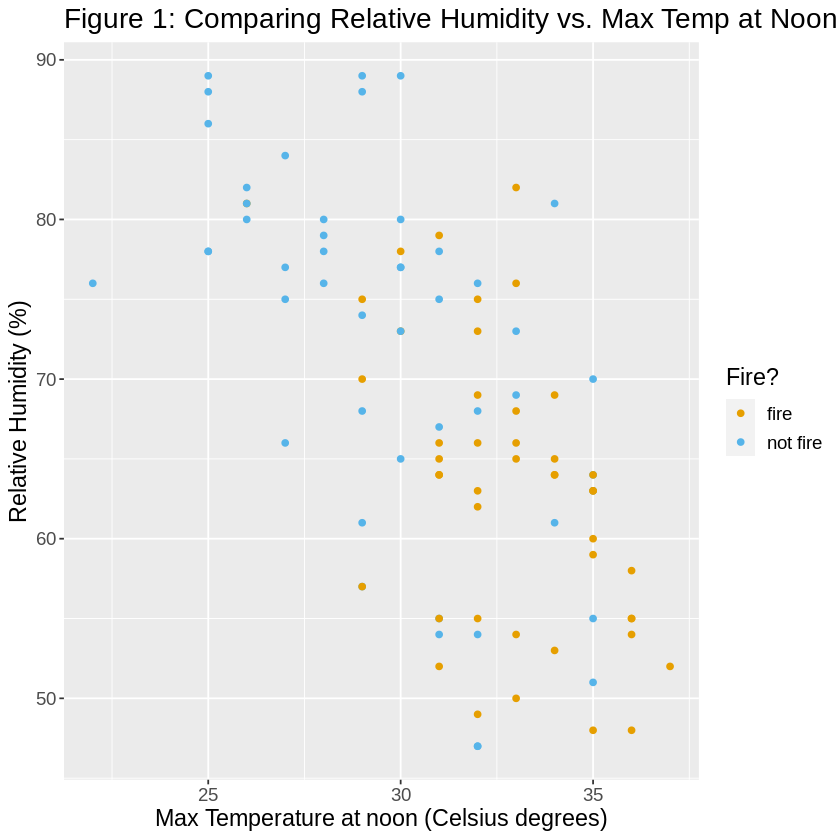

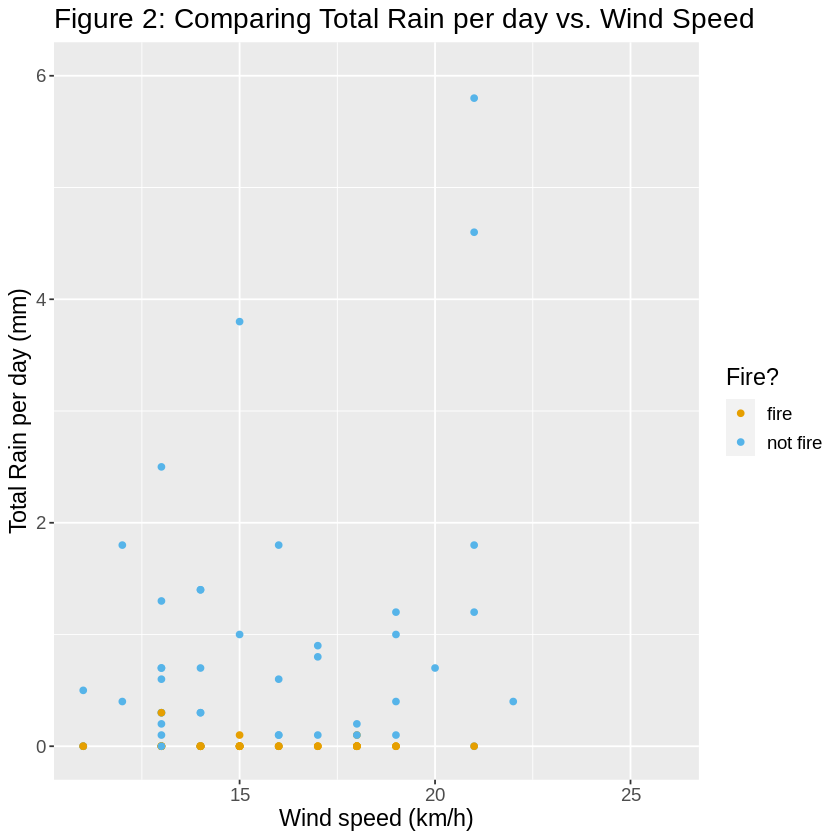

In [5]:
## Visualization plot examples 

#Plotting Relative Humidity vs. Temperature, as well as, Rain vs. Windspeed to see if there is any relationship and if the the predictors we chose are significant for our data analysis


cbPalette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999")
Temp_RH_plot <- ggplot(fire_train, aes(x = Temperature, y = RH, colour = Classes)) + 
                geom_point() + 
                labs(x = "Max Temperature at noon (Celsius degrees)", y = "Relative Humidity (%)", color = "Fire?") + 
                scale_color_manual(values = cbPalette) +
                theme(text = element_text(size = 14))+
                ggtitle("Figure 1: Comparing Relative Humidity vs. Max Temp at Noon (Celsius)")
Temp_RH_plot

 
WS_Rain_plot <- ggplot(fire_train, aes(x = Ws, y = Rain, colour = Classes)) + 
                geom_point() + 
                labs(x = "Wind speed (km/h)", y = "Total Rain per day (mm)", color = "Fire?") + 
                scale_color_manual(values = cbPalette) + 
                theme(text = element_text(size = 14)) +
                scale_y_continuous(limits = c(0, 6))+
                ggtitle("Figure 2: Comparing Total Rain per day vs. Wind Speed ")
WS_Rain_plot

By looking at Figure 1 (Relative Humidity vs. Temp), we are able to see a relationship between the two variables. Lower temperature and higher relative humidity indicate that there will not be fires. On the other hand, conditions with higher temperatures and low relative humidity contain a mix of fire and no fires. However, the data points show that the majority of fires do occur in this range. We were not only able to see a clear relationship between the two predictors by plotting it, but further research showed that a combination of low humidity and high temperature can cause plants to dry up, which results in fires spreading quickly (Idaho Firewise, n.d.). Using this information allowed us to conclude that using these two predictors for our analysis would be sufficient in helping with the prediction. 

From looking at Figure 2 (Rain per Day vs. Wind Speed), we can see that as long as there is no rain it does not really matter how strong the wind is for there to be a fire. Since rain is a pretty big factor in forest fires, we figured it would be a good predictor to keep. Wind speed is not a good predictor because the graph shows that there isn't a clear relationship between the two variables. For example, forest fires were present along a wide range of wind speeds when there was no rain, and along that same range there were also a lot of data points with no forest fires. We removed wind speed from our data analysis and we were able to test our classifier’s accuracy, which resulted in getting a higher classifier accuracy. From this, we were able to conclude that having wind speed would not be a good predictor in our analysis. 
 

! Fold01: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold02: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold03: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold04: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold05: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold06: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold07: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold08: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold09: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold10: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold11: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold12: internal: No observations were de

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6444444,30,0.04709528,Model01
1,roc_auc,hand_till,0.6416667,30,0.04746949,Model01
3,accuracy,multiclass,0.6500000,30,0.05123008,Model02
3,roc_auc,hand_till,0.7625000,30,0.05372276,Model02
4,accuracy,multiclass,0.6583333,30,0.05245414,Model03
4,roc_auc,hand_till,0.7333333,30,0.04708963,Model03


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6444444,30,0.04709528,Model01
3,accuracy,multiclass,0.6500000,30,0.05123008,Model02
4,accuracy,multiclass,0.6583333,30,0.05245414,Model03
5,accuracy,multiclass,0.6638889,30,0.04598908,Model04
6,accuracy,multiclass,0.6638889,30,0.04598908,Model05
7,accuracy,multiclass,0.6972222,30,0.04917638,Model06


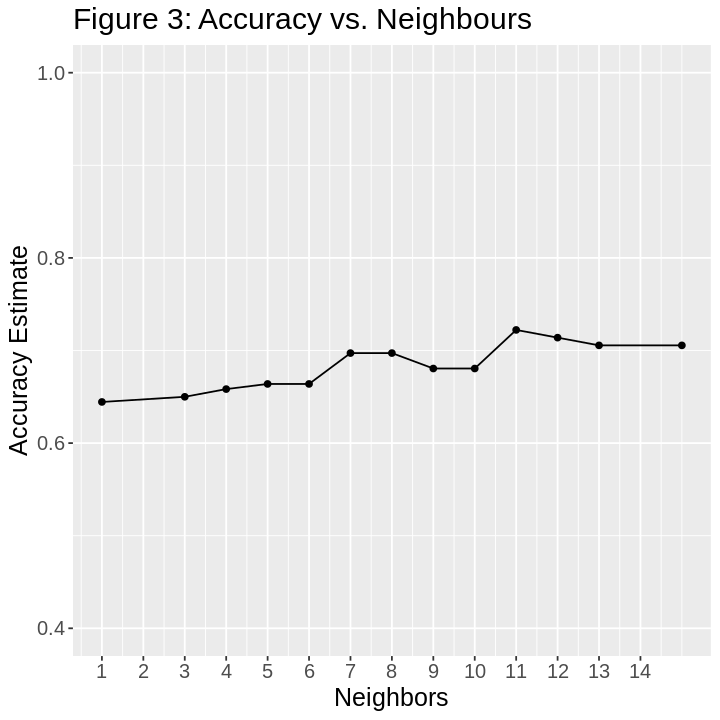

In [14]:
## Evaluation of Temperature and Relative Humidity 

set.seed(1738)

#computing 30-fold cross-validation 
fire_training_vfold <- vfold_cv(fire_train, v = 30, strata = Classes)


#creating a knn model specification 
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
      set_mode("classification") 


#creating the standardization recipe based on the training data
#not including the windspeed (discussion explains why)
fire_recipe <- recipe(Classes ~ Rain + RH + Temperature,  data = fire_train) %>%
        step_scale(all_predictors()) %>%
        step_center(all_predictors()) 


#fitting the model and specifiying that the tuning should try 15 numbers of K neighbors 
cross_val_metrics <- workflow() %>%
                add_recipe(fire_recipe) %>%
                add_model(knn_tune) %>%
                tune_grid(resamples = fire_training_vfold, grid = 15) %>%
                collect_metrics()
head(cross_val_metrics) 


#filtering the .metric column for just accuracy 
accuracies <- cross_val_metrics %>% 
       filter(.metric == "accuracy")
head(accuracies)


#plotting accuracy vs. neighbours to see which K value gives the highest accuracy 
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) + # adjusting the y-axis
       ggtitle("Figure 3: Accuracy vs. Neighbours")+
       theme(text=element_text(size=15))
cross_val_plot

In [7]:
#evaluating our classifers accuracy with the number of K neighbors that we found 
fire_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
      set_engine("kknn") %>%
      set_mode("classification")


#fitting the data
fire_fit <- workflow() %>%
      add_recipe(fire_recipe) %>%
      add_model(fire_spec) %>%
      fit(data = fire_train)


#computing the accuracy of our classifer   
fire_preds <- predict(fire_fit, fire_test) %>%
      bind_cols(fire_test)


#using the metrics function to collect the statistics about the accuracy percentage of our model 
fire_metrics <- fire_preds %>% 
    metrics(truth = Classes, estimate = .pred_class)


#using conf_mat function to show a table of what label our classifer predicted right 
fire_conf_mat <- fire_preds %>% 
    conf_mat(truth = Classes, estimate = .pred_class) 

fire_metrics
fire_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7586207
kap,multiclass,0.5223529


          Truth
Prediction Classes fire not fire
  Classes        0    0        0
  fire           0   13        6
  not fire       0    1        9

### Discussion 

By using cross validation to find the number of K nearest neighbors to use, we were able to pick our K nearest neighbors as 11. We chose 11 because this is where the accuracy is the highest. However, if we were to choose any value from the right and left of 11, we would get approximately the same accuracy percentage of our classifier. After finding out the most accurate K value, we evaluated our classifier’s accuracy by using the K value we found. By using the three predictors of rain, temperature, and relative humidity, we were able to create a K-nearest neighbours classification model with 76% accuracy. Looking at the confusion matrix showed that our classifier predicted 13 fire observations correctly, but predicted 6 as fire when truly they were not fire. Also, the classifier predicted 9 not fire observations correctly, and 1 incorrectly. 
 
 
 
While we were able to create a model with a decent prediction accuracy, 76% accuracy is not the ideal accuracy for predicting forest fires. Forest fires are very dangerous and harmful to our economy and environment, therefore we would like to have a higher classifier accuracy. Our original expected outcome was to somewhat accurately predict forest fires from the variables we chose. We were able to predict with some accuracy, but not to the level we had expected or would like. We thought that since the FWI components are based on rain, wind speed, temperature, and relative humidity, that they will contribute the most in determining forest fires. Perhaps including additional predictors like the FWI components can help our classifier be more accurate. Another idea to improve our classifier’s accuracy is to include more data so that the classifier can use the data to train on. 
 
It would have been interesting to include some regression analysis here. Specifically, using a probit regression model: where we could set the dependent variable to fire or not fire. By looking at the coefficients of the different explanatory variables we could get a better idea at how each variable contributes to the likelihood of a fire, controlling for the other variables. We also think that by looking at changes across time over two similar samples would have been interesting - to see how different factors contribute towards the likelihood of fires across time periods. In general, one of the challenges here is the correlation between variables. We think it can be expected that some of the variables we used like wind and temperature have some correlation with each other. It would have been nice to control for these kinds of correlations to get a better idea at how different factors individually contribute to forest fire likelihood. With better knowledge of what factors contribute to forest fires, governments and individuals in Algeria and across the world can have a better understanding of what leads to forest fires. This will also bring attention to the growing damage caused by climate change and hopefully convince more people to reduce their carbon footprint and take positive measures to curb this pandemic.





### References 

UCI Machine Learning Repository. (2019, October 2). Algerian forest fires dataset data set.   https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

National Wildfire Coordinating Group. (2021, March 10). Fire weather index (FWI) system. https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system

Idaho Firewise (n.d.). Fire ignition, behavior & effects. https://idahofirewise.org/fire-ecology-and-management/wildfire-ignition-behavior-and-effects/

Climate Access of Canada (n.d.). Forest fires and climate change. 
	https://climateatlas.ca/forest-fires-and-climate-change 